<a href="https://colab.research.google.com/github/ritwickraj78/Covid-Prediction/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
col_list = ["Date", "NN5-001"]
df = pd.read_excel('/content/NN5_dataset_version1.xlsx', usecols=col_list)
df.head()

,Date,NN5-001
0,1996-03-18,13.407029
1,1996-03-19,14.725057
2,1996-03-20,20.564059
3,1996-03-21,34.708050
4,1996-03-22,26.629819


In [ ]:
from google.colab import files
uploaded = files.upload()


TypeError: ignored

# New section

# New section

In [ ]:
import io
import pandas as pd
col_list = ["Date", "NN5-001"]
df = pd.read_excel('/content/NN5_dataset_version1.xls', usecols=col_list)

In [ ]:
df.tail()

,Date,NN5-001
0,1996-03-18,13.407029
1,1996-03-19,14.725057
2,1996-03-20,20.564059
3,1996-03-21,34.708050
4,1996-03-22,26.629819


In [ ]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
df

,Date,NN5-001
0,1996-03-18,13.407029
1,1996-03-19,14.725057
2,1996-03-20,20.564059
3,1996-03-21,34.708050
4,1996-03-22,26.629819
...,...,...
786,1998-05-13,44.373583
787,1998-05-14,65.206916
788,1998-05-15,49.744898
789,1998-05-16,34.481293


In [ ]:
df.describe()

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df

,NN5-001
Date,
1996-03-18,13.407029
1996-03-19,14.725057
1996-03-20,20.564059
1996-03-21,34.708050
1996-03-22,26.629819
...,...
1998-05-13,44.373583
1998-05-14,65.206916
1998-05-15,49.744898


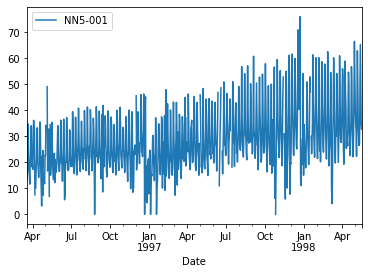

In [ ]:
df.plot()

In [ ]:
mean_value=df['NN5-001'].mean()
  
df['NN5-001'].fillna(value=mean_value, inplace=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


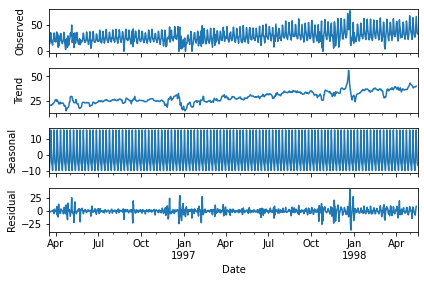

In [ ]:
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(df['NN5-001'],model='additive')
resplot=res.plot()

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
result = adfuller(df['NN5-001'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.5802889781341016
p-value: 0.493486982869065
Critical Values:
	1%: -3.4388710830827125
	5%: -2.8653008652386576
	10%: -2.568772659807725


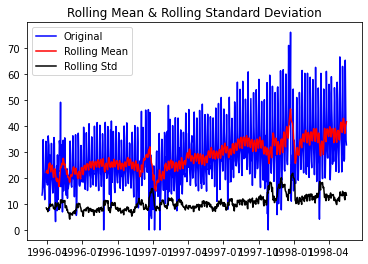

In [ ]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['NN5-001']); axes[0, 0].set_title('Original Series')
plot_acf(df['NN5-001'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['NN5-001'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['NN5-001'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['NN5-001'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['NN5-001'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

ValueError: ignored

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 791 entries, 1996-03-18 to 1998-05-17
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NN5-001  791 non-null    float64
dtypes: float64(1)
memory usage: 12.4 KB
None


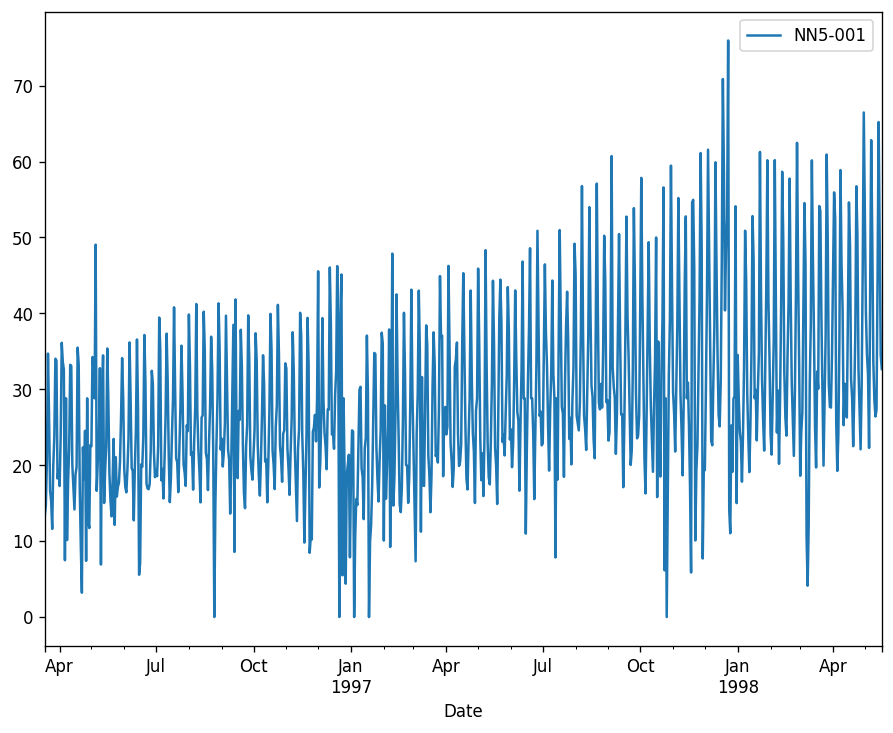

In [ ]:
df.plot()

In [ ]:
df['seasonal_first_diff']=df['NN5-001']-df['NN5-001'].shift(12)

In [ ]:
df['NN5-001'].shift(12)

Date
1996-03-18          NaN
1996-03-19          NaN
1996-03-20          NaN
1996-03-21          NaN
1996-03-22          NaN
                ...    
1998-05-13    53.089569
1998-05-14    40.164399
1998-05-15    34.566327
1998-05-16    31.972789
1998-05-17    22.278912
Name: NN5-001, Length: 791, dtype: float64

In [ ]:
df['seasonal_first_diff']=df['seasonal_first_diff'].dropna()

In [ ]:
df['seasonal_first_diff'].dropna()

Date
1996-03-30     4.846939
1996-03-31     4.662698
1996-04-01    -3.302154
1996-04-02   -10.898526
1996-04-03     9.495465
                ...    
1998-05-13    -8.715986
1998-05-14    25.042517
1998-05-15    15.178571
1998-05-16     2.508503
1998-05-17    10.388322
Name: seasonal_first_diff, Length: 779, dtype: float64

In [ ]:
result = adfuller(df['seasonal_first_diff'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -7.297360283724436
p-value: 1.3668381780968542e-10
Critical Values:
	1%: -3.4390179167598367
	5%: -2.8653655786032237
	10%: -2.5688071343462777


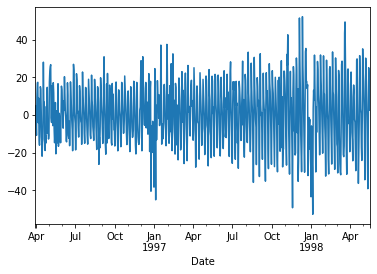

In [ ]:
df['seasonal_first_diff'].dropna().plot()

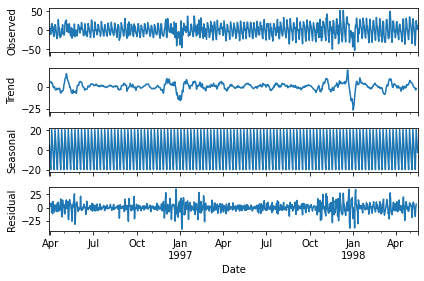

In [ ]:
import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(df['seasonal_first_diff'].dropna(),model='additive')
resplot=res.plot()


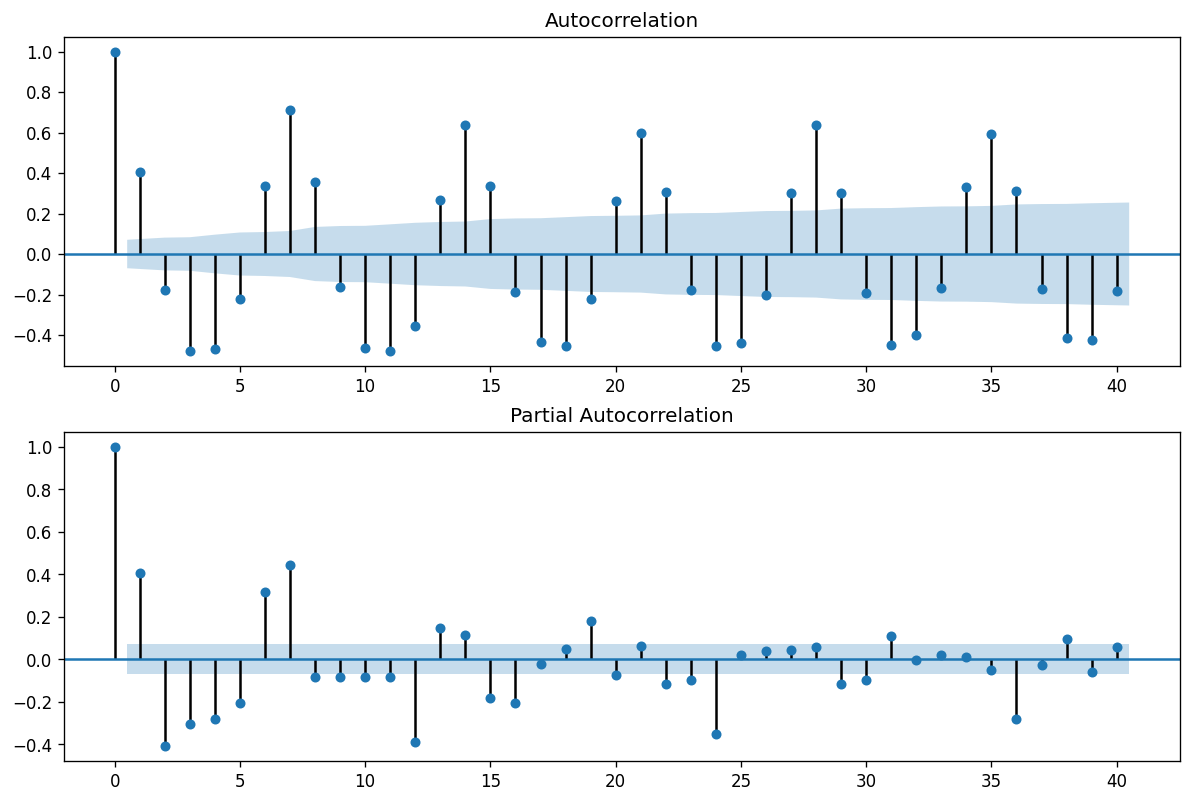

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['seasonal_first_diff'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['seasonal_first_diff'].iloc[13:],lags=40,ax=ax2)


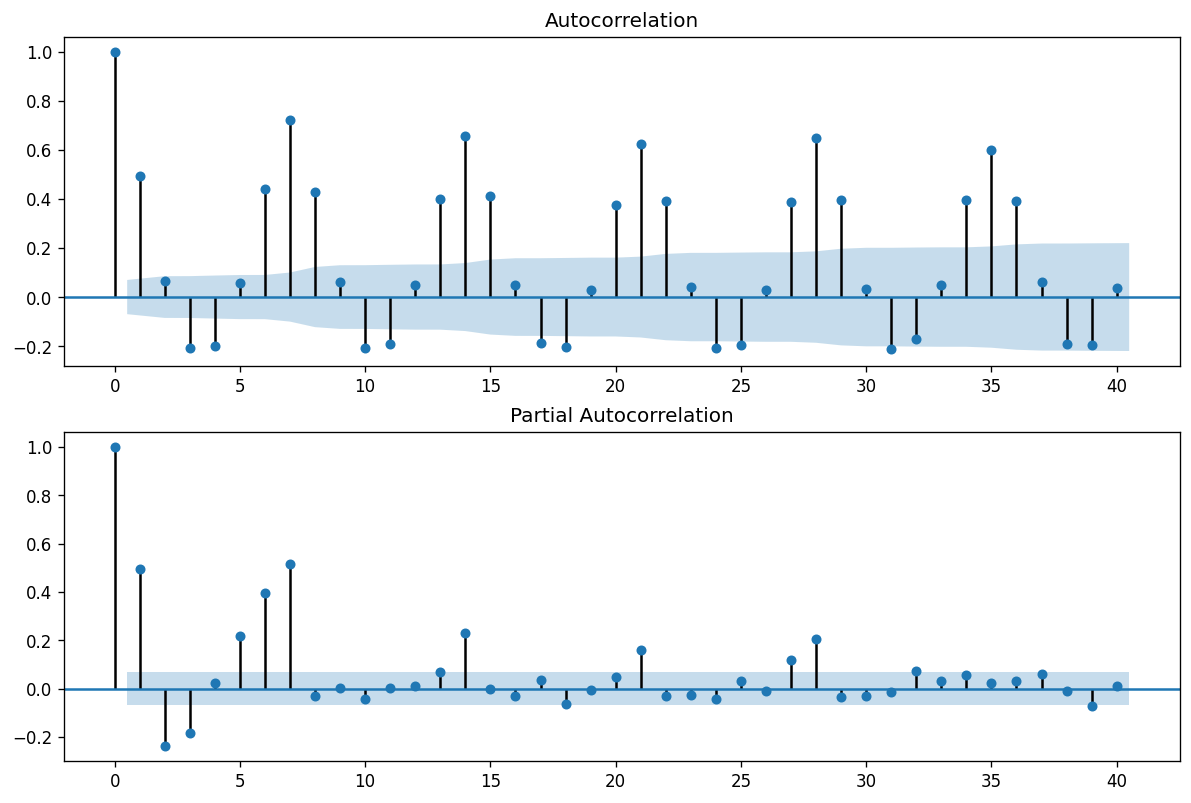

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['NN5-001'],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['NN5-001'],lags=40,ax=ax2)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarimax_model= SARIMAX(df['NN5-001'],order=(3,1,0),seasonal_order=(5,1,2,12))
res=sarimax_model.fit(disp=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


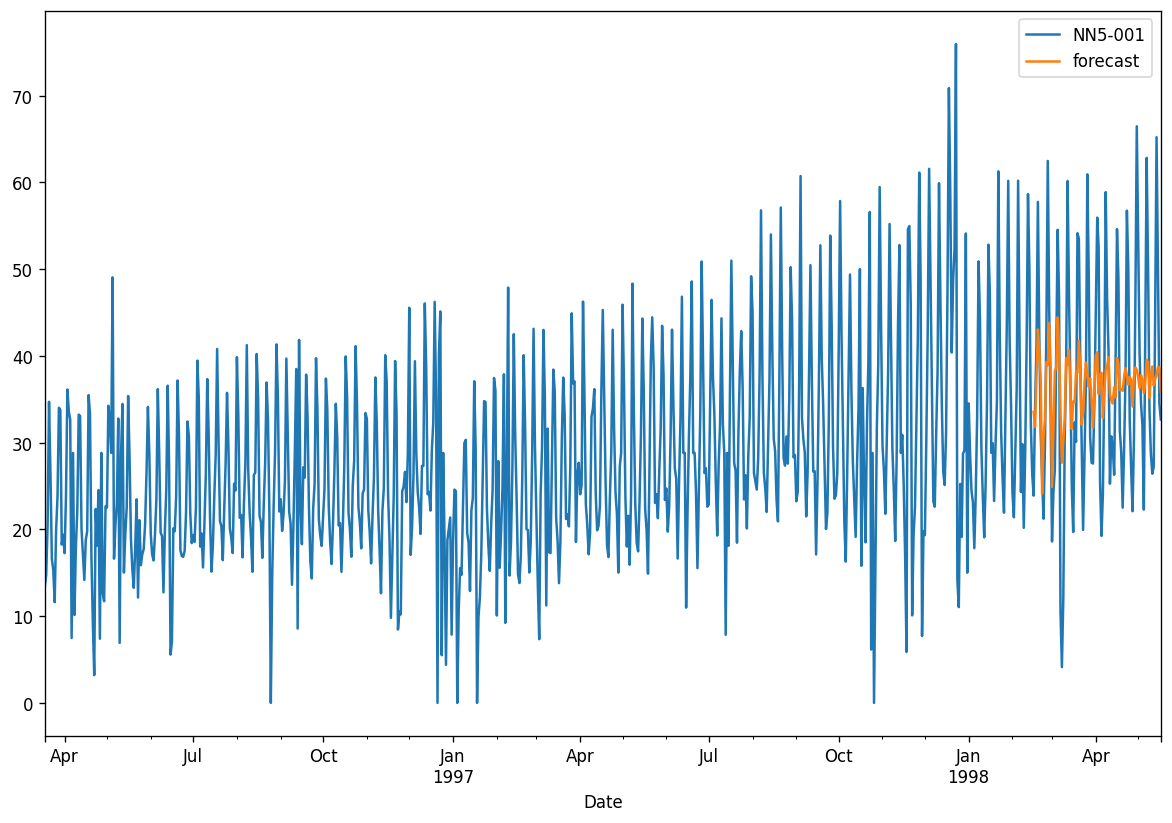

In [ ]:
df['forecast']=res.predict(start=700, end=791,dynamic=True)
df[['NN5-001','forecast']].plot(figsize=(12,8))

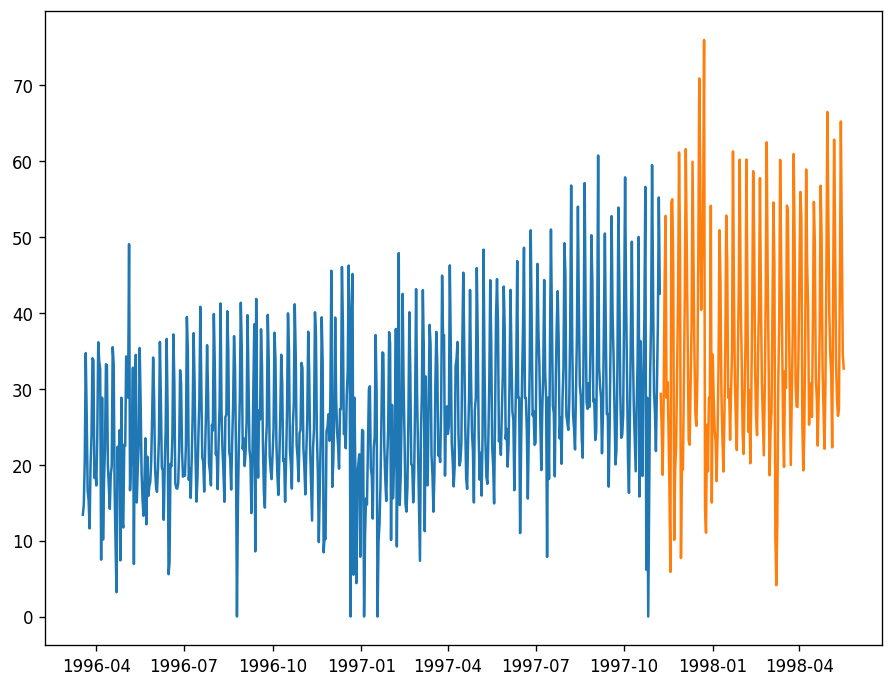

In [ ]:
train=df[:600]
test=df[-191:]
plt.plot(train)
plt.plot(test)

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4961.293, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4833.069, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4960.508, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4648.315, Time=0.78 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4478.047, Time=1.98 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4479.830, Time=3.98 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=4479.793, Time=3.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.82 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=4457.836, Time=11.82 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=4443.408, Time=19.67 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=4481.722, Time=6.95 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=inf, Time=40.00 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=inf, Time=31.31 sec
 ARIMA(0,1,0)(5,1,1)[12]           

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  600
Model:             SARIMAX(3, 1, 0)x(5, 1, [1, 2], 12)   Log Likelihood               -2118.119
Date:                                 Tue, 15 Jun 2021   AIC                           4258.238
Time:                                         11:42:42   BIC                           4306.363
Sample:                                              0   HQIC                          4276.990
                                                 - 600                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7129      0.033    -21.797      0.000      -0.777      -0.649
ar.L2         -0.6103      0.037    -16.564      0.000      -0.683      -0.538
ar.L3         -0.2668      0.037     -7.231      0.000      -0.339      -0.194
ar.S.L12      -0.0351      0.082     -0.430      0.667      -0.195       0.125
ar.S.L24      -0.5912      0.047    -12.562      0.000      -0.683      -0.499
ar.S.L36      -0.1575      0.066     -2.392      0.017      -0.286      -0.028
ar.S.L48      -0.0916      0.053     -1.720      0.085      -0.196       0.013
ar.S.L60      -0.5327      0.046    -11.598      0.000      -0.623      -0.443
ma.S.L12      -0.9732      0.096    -10.131      0.000      -1.162      -0.785
ma.S.L24       0.2870      0.092      3.119      0.002       0.107       0.467
sigma2        72.4531      3.415     21.214      0.000      65.759      79.147
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                95.62
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.09
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df


,NN5-001
Date,
1996-03-18,13.407029
1996-03-19,14.725057
1996-03-20,20.564059
1996-03-21,34.708050
1996-03-22,26.629819
...,...
1998-05-13,44.373583
1998-05-14,65.206916
1998-05-15,49.744898


In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 191),index=test.index)
prediction.columns = ['NN5-001']
prediction


,NN5-001
Date,
1997-11-08,34.443882
1997-11-09,26.715484
1997-11-10,28.268876
1997-11-11,27.734513
1997-11-12,40.815803
...,...
1998-05-13,40.761596
1998-05-14,42.697232
1998-05-15,41.629474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


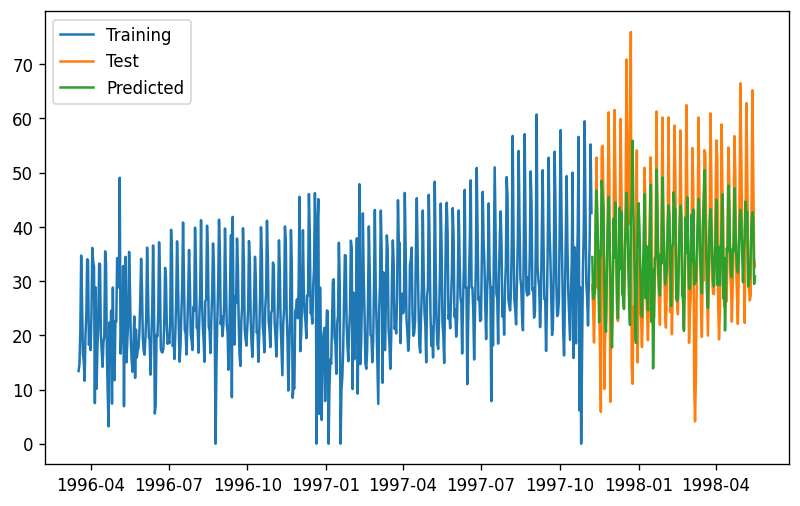

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [ ]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [ ]:
smape(test['NN5-001'],prediction['NN5-001'])

24.54281114187016

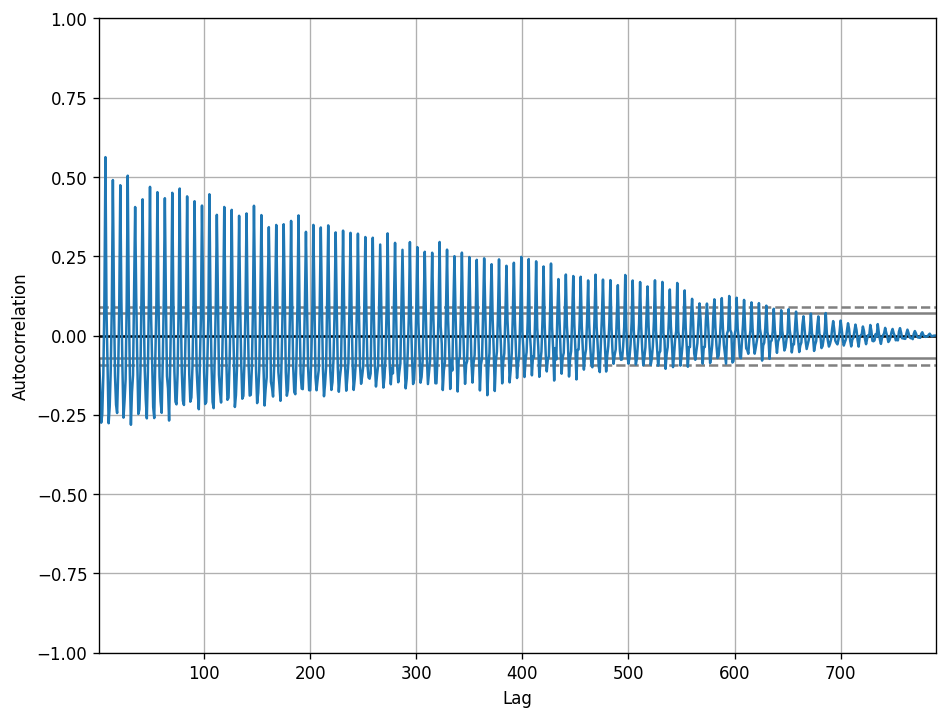

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_diff['NN5-001'])
plt.show()

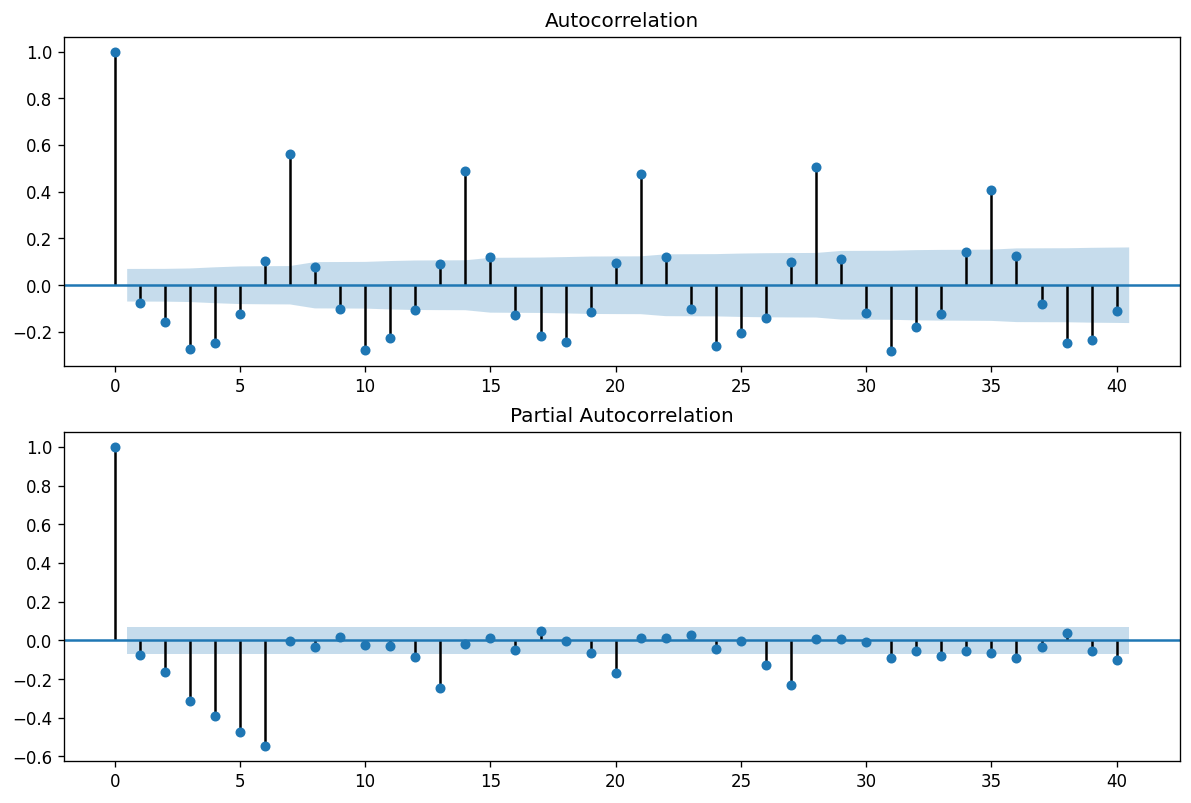

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff['NN5-001'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff['NN5-001'].dropna(),lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['NN5-001'],order=(3,1,0))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.NN5-001   No. Observations:                  790
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -3033.528
Method:                       css-mle   S.D. of innovations             11.254
Date:                Tue, 15 Jun 2021   AIC                           6077.057
Time:                        11:57:28   BIC                           6100.417
Sample:                    03-19-1996   HQIC                          6086.036
                         - 05-17-1998                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0287      0.244      0.118      0.906      -0.449       0.507
ar.L1.D.NN5-001    -0.1392      0.034     -4.120      0.000      -0.205      -0.073
ar.L2.D.NN5-001    -0.1917      0.033     -5.726      0.000      -0.257      -0.126
ar.L3.D.NN5-001    -0.3125      0.034     -9.236      0.000      -0.379      -0.246
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4902           -1.3295j            1.4170           -0.1938
AR.2            0.4902           +1.3295j            1.4170            0.1938
AR.3           -1.5937           -0.0000j            1.5937           -0.5000
-----------------------------------------------------------------------------
"""

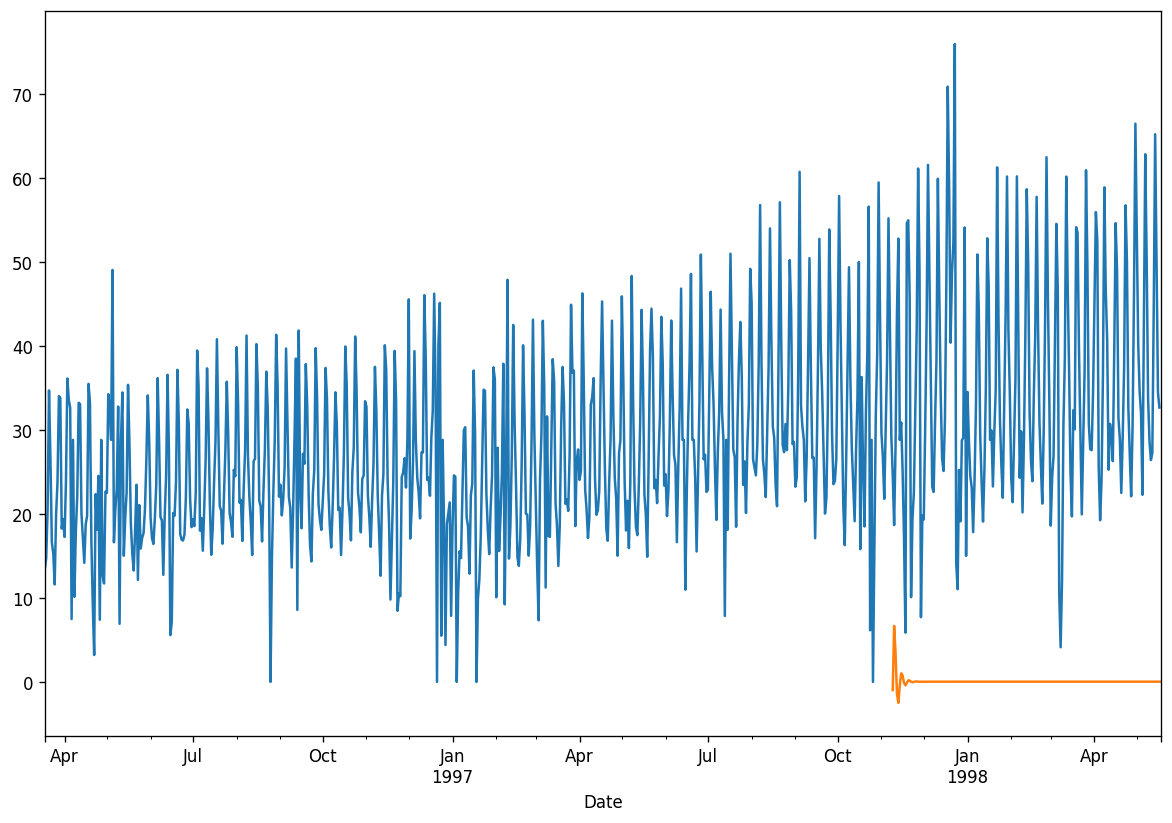

In [ ]:
predicted=model_fit.predict(start=601,end=791,dynamic=True)
df['NN5-001'].plot(figsize=(12,8))
predicted.plot(figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


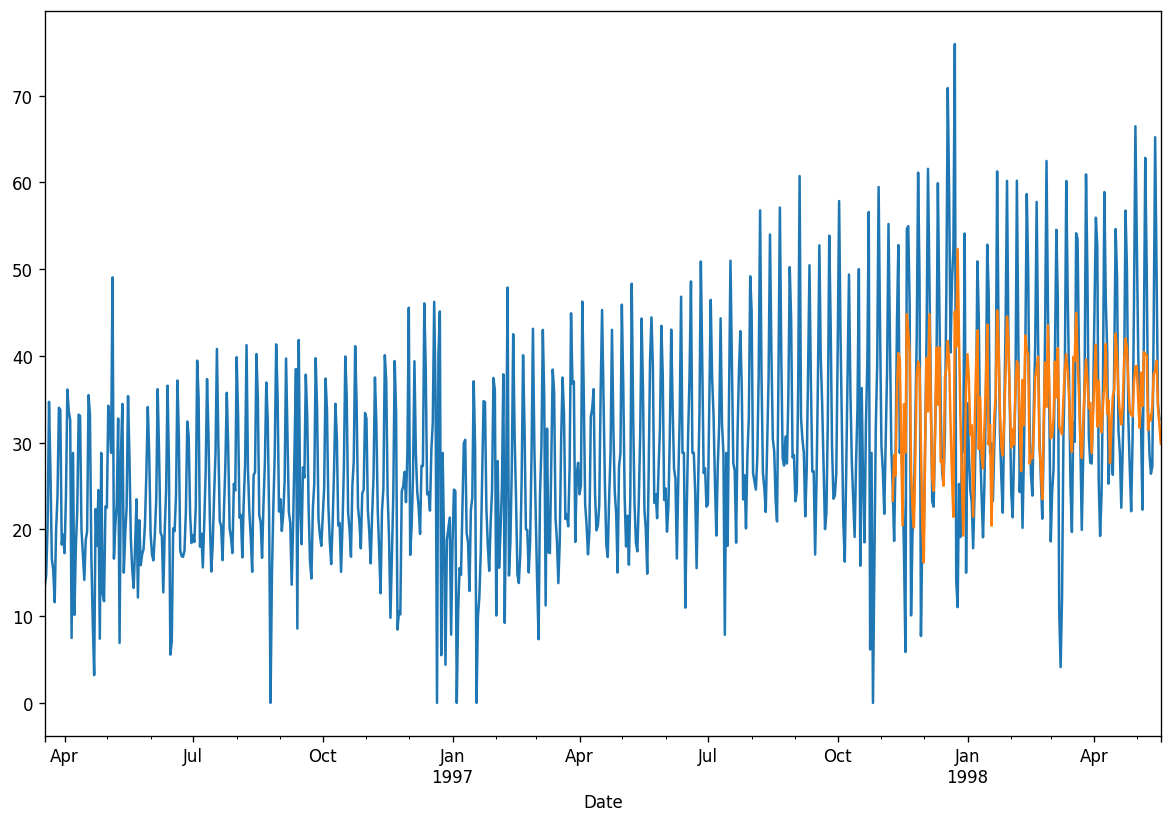

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['NN5-001'],order=(3, 1, 0),seasonal_order=(5,1,2,12))
results=model.fit()
predicted=results.predict(start=601,end=791,dynamic=True)
df['NN5-001'].plot(figsize=(12,8))
predicted.plot(figsize=(12,8))

In [ ]:
smape(test['NN5-001'],predicted)

25.510163715219417